Description Here

In [1]:
import pandas as pd #creates dataframe structure (similar to an excel sheet)
import numpy as np #multi-dimensional array and matrix data structures, mathematical operations on arrays such as trigonometric, statistical, and algebraic routines.
import matplotlib.pyplot as plt #plotting package

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor.html] 

Public Source Data - https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

Each record contains the values of a cell's characteristics. The fields in each record:

|Field name|Description|
|---|---|
|ID|Identifier|
|Clump|Clump Thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign(2) or malignant(4)|

We're using a dataset with 10 predictors (fields/columns) in each record and 700 records (rows) total.



In [2]:
df = pd.read_csv('cell_samples.csv') #reads csv file into pandas dataframe
df.tail()
df.shape #699 rows, 11 dimensions
df.size #7689 bytes of data
df.count() #quantity of values of each column (699 each)
df['Class'].value_counts() #458 of 2(benign) and 241 of 4(malignant)




2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

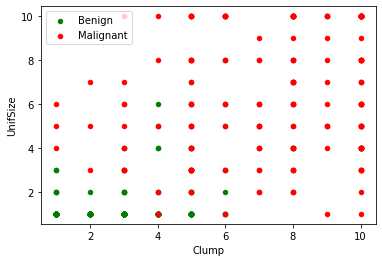

In [3]:
malignant_df = df[df['Class']==4][0:200]
benign_df = df[df['Class']==2][0:200]

#help(benign_df.plot()) - tells us possible usage of the statement

axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize', color= 'green', label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize', color= 'red', label='Malignant', ax=axes)


In [4]:
#removing unwanted dimensions
df.dtypes #tells us that BareNuc is an object so cannot be factored into our modeling and needs to be removed or replaced

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]#converts all nonnull records to numeric values
df['BareNuc'] = df['BareNuc'].astype('int') #assures that all BareNuc records are ints and not objects
df.dtypes #returns our data types

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [5]:
#SORTING DATA

df.columns
#returns all columns: ['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
#'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']


feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#removed fields ID (nonInformative) and Class(prediction not predictor)


X = np.asarray(feature_df)
#changes dataframe to numpy array to be fed into our training and testing methods. 
#X denotes indp. variables (predictors)


y = np.asarray(df['Class'])
#y denotes dependent variables (predictions)


X[0:5]
#values now are stores as mutidimensional array (2D), aka a matrix

y[0:5]
#saved predictions/dependent answers

array([2, 2, 2, 2, 2])

In [6]:
#DIVIDING DATA INTO TEST AND TRAIN
'''
80% train, 20% test
Train(X,y) ##X is a 2D array and y is a 1D
Test(X,y)
'''
#necessary import
from sklearn.model_selection import train_test_split


#splits data for us into specified proportions and selects data randomly for each category
#returns four arrays for us as semantically named
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

X_train.shape #546 x 9
y_train.shape #546 x 1

X_test.shape #137 x 9
y_test.shape #137 x 1






(137,)

In [7]:
#MODELING SVM 

from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma = 'auto', C=2) #linear, polynomial, radial basis function(default), sigmoid, C is (2 units)penalty on incorrect data points
classifier.fit(X_train, y_train) #model fits itself to data

y_predict = classifier.predict(X_test) #predictions based off of ML model





In [13]:
#EVALUATE

from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict)) #provides accuracy

#precision = ratio of true predictions/true + false predictions

#recall = out of all predictions, how many have been accurately predicted by the model

#f1-score = 2*((precision*recall)/(precision+recall))

#support = how many cases of each are predicted



              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

